In [231]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [4]:
#Load our dataframe account for the index columns
df = pd.read_csv('case_study.csv', index_col=0)

/Users/OwenPeng/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (171) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
# Quickly check to see the size of our DF, both rows and columns
df.shape

(34545, 358)

In [6]:
df.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
49938,9.0,5.0,5172017,5,17,2017,1200.0,2017000001,2.017000e+09,NaN,...,2.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
49939,9.0,2.0,2142017,2,14,2017,1200.0,2017000002,2.017000e+09,NaN,...,1.0,1.0,1.0,1.0,1.0,2.0,2.0,NaN,NaN,2.0
49940,9.0,1.0,1292017,1,29,2017,1200.0,2017000003,2.017000e+09,NaN,...,3.0,2.0,1.0,3.0,2.0,1.0,1.0,NaN,NaN,2.0
49941,9.0,7.0,9112017,9,11,2017,1200.0,2017000004,2.017000e+09,NaN,...,2.0,2.0,2.0,2.0,2.0,1.0,1.0,NaN,NaN,1.0
49942,9.0,5.0,7182017,7,18,2017,1200.0,2017000005,2.017000e+09,NaN,...,2.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,2.0


## Subset your dataframe to only include the states in the tri-state area (NJ, CT, NY)

Now check to see how large our subset df.

In [7]:
# your code here
df['PHYSHLTH']

49938     88.0
49939     88.0
49940      2.0
49941     88.0
49942     88.0
          ... 
303774    88.0
303775    88.0
303776     6.0
303777    88.0
303778    88.0
Name: PHYSHLTH, Length: 34545, dtype: float64

**PHYSHLTH** is the column we are interested in for this analysis, so let's start to investigate the column. Since we have a data cookbook, a.k.a. data dictionary) we want to start there before looking at the code. 

In [8]:
df['PHYSHLTH'].describe()

count    34545.000000
mean        60.213403
std         37.504566
min          1.000000
25%         15.000000
50%         88.000000
75%         88.000000
max         99.000000
Name: PHYSHLTH, dtype: float64

## 1. Handle the non-normal values

As you can see from the data dictionary, there are a number of responses that are coded with values that could throw off our descriptive statistics.  Let's clean up by mapping the responses to a more appropriate value, and handling any missing values.  

In [9]:
#your code here
#Convert zero values to the value of zero and convert non-response values into Nan's
health_replacement = {88:0, 77:np.nan, 99:np.nan}
df['PHYSHLTH'].replace(health_replacement,inplace=True)


## 2. Generate the descriptive statistics

Now that our target variable is cleaned up lets calculate the descriptive statistics, generate a graph that quickly shows those statistics, and generate a gprah shows the histogram of the data.

In [10]:
# descriptive statistics
df['PHYSHLTH'].describe()

count    33747.000000
mean         4.085341
std          8.513293
min          0.000000
25%          0.000000
50%          0.000000
75%          3.000000
max         30.000000
Name: PHYSHLTH, dtype: float64

(array([24827.,  2901.,   927.,   774.,   405.,   671.,   431.,    86.,
          173.,  2552.]),
 array([ 0.,  3.,  6.,  9., 12., 15., 18., 21., 24., 27., 30.]),
 <a list of 10 Patch objects>)

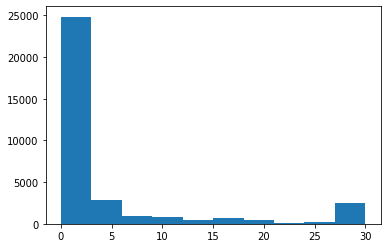

In [11]:
# graphic showing those descriptive stats
plt.hist(df['PHYSHLTH'].dropna())

{'whiskers': [<matplotlib.lines.Line2D at 0x123550990>,
 'caps': [<matplotlib.lines.Line2D at 0x1236b9b10>,
 'boxes': [<matplotlib.lines.Line2D at 0x123550950>],
 'medians': [<matplotlib.lines.Line2D at 0x123563b50>],
 'fliers': [<matplotlib.lines.Line2D at 0x12355cc50>],
 'means': []}

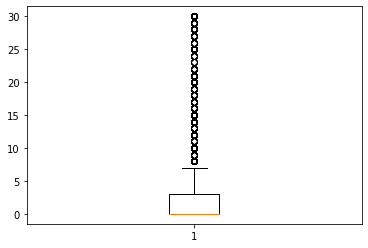

In [12]:
# graphic showing the distribution of data

plt.boxplot(df['PHYSHLTH'].dropna())

## 3. Generate a graphic that compares the average number of sick days for each state. 

In [13]:
# code to calculate the average number of sick days by state
df.groupby('_STATE')['PHYSHLTH'].mean()

_STATE
9.0     3.688562
34.0    4.380957
36.0    4.148030
Name: PHYSHLTH, dtype: float64

<BarContainer object of 3 artists>

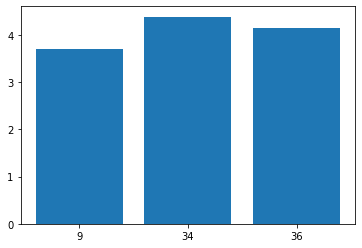

In [14]:
# code to graph those averages using matplotlib
plt.bar(["9","34","36"], df.groupby('_STATE')['PHYSHLTH'].mean())


## 4. Turn the number of sick days into a classification of of chronically sick people.  

Chronically sick people account for a significant proportion of the costs for health insurers. If we can identify what leads people to be chronically sick, we can address them with specific treatments.



In [15]:
# code to create new colum for chronically sick
df['Chronically Sick']= np.where(df['PHYSHLTH']==30,1,0)
df['Sick']= np.where(df['PHYSHLTH']<=15,1,0)
df['Chronically Sick'].describe()

count    34545.000000
mean         0.070575
std          0.256117
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Chronically Sick, dtype: float64

## 5. Create a graphic that compares the percentage of people labeled as 'sick' in each state. 

<BarContainer object of 3 artists>

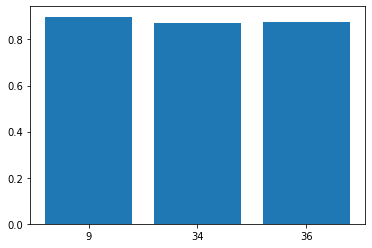

In [16]:
# code to calculate averages per state
plt.bar(["9","34","36"], df.groupby('_STATE')['Sick'].mean())

<BarContainer object of 3 artists>

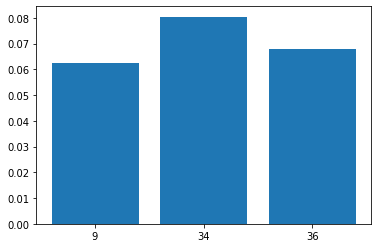

In [70]:
# create graphic to compare chronically sick by state
plt.bar(["9","34","36"], df.groupby('_STATE')['Chronically Sick'].mean())

## 6. Independent Variables (categorical)

Let's take the column `SMOKDAY2` and start to prepare it so that we can see how it is possibly correlated to `PHYSHLTH`.

1. Clean up the values.
2. Calculate the descriptive statistics of the variable.
3. Generate a histogram for the variable.
4. Generate graphics that show how the responses to this variable might differ by state.
5. Generate a graphic that compares the physical health of the different groups of 'smokers'.

In [130]:
df['SMOKDAY2'].describe()

count   13,750
mean         3
std          1
min          1
25%          2
50%          3
75%          3
max          3
Name: SMOKDAY2, dtype: float64

In [19]:
smoke_replace = {7:np.nan, 9:np.nan}
smoke_replace2 = {7:np.nan, 9:np.nan, 2:0, 1:np.nan}
df['SMOKDAY2'].replace(smoke_replace,inplace=True) 
df['SMOKE100'].replace(smoke_replace2,inplace=True)

In [328]:
pd.options.display.float_format = '{:,.2f}'.format
#gets rid of floats

        
    

(array([2676.,    0.,    0.,    0.,    0., 1371.,    0.,    0.,    0.,
        9703.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <a list of 10 Patch objects>)

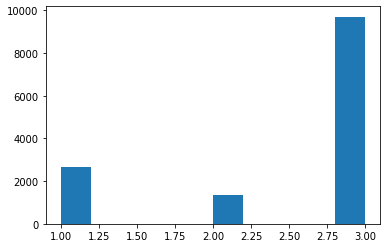

In [131]:
plt.hist(df['SMOKDAY2'].dropna())


(array([    0.,     0.,     0.,     0.,     0., 19087.,     0.,     0.,
            0.,     0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <a list of 10 Patch objects>)

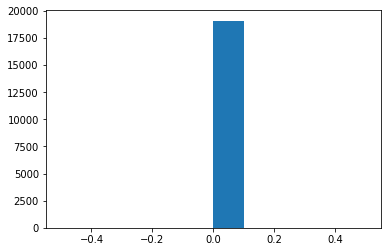

In [22]:
plt.hist(df['SMOKE100'].dropna())

(array([2676.,    0.,    0.,    0.,    0., 1371.,    0.,    0.,    0.,
        9703.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <a list of 10 Patch objects>)

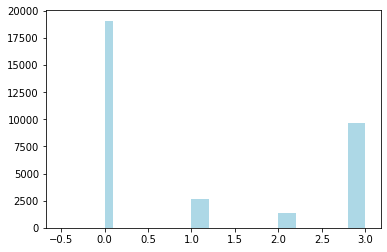

In [40]:
plt.hist(df['SMOKE100'].dropna(), color='lightblue')
plt.hist(df['SMOKDAY2'].dropna(), color='lightblue')

In [84]:
df.groupby('_STATE')['SMOKDAY2'].describe()
        

,count,mean,std,min,25%,50%,75%,max
_STATE,,,,,,,,
9,"4,282",3,1,1,3,3,3,3
34,"4,740",3,1,1,2,3,3,3
36,"4,728",2,1,1,2,3,3,3


<BarContainer object of 3 artists>

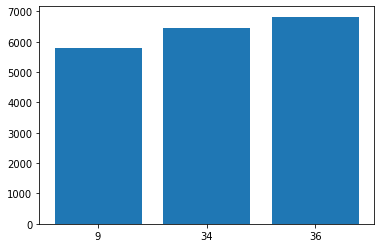

In [72]:
plt.bar(['9','34','36'],df.groupby('_STATE')['SMOKE100'].count())

<BarContainer object of 3 artists>

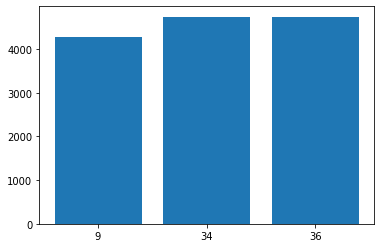

In [73]:
plt.bar(['9','34','36'],df.groupby('_STATE')['SMOKDAY2'].count())

<BarContainer object of 3 artists>

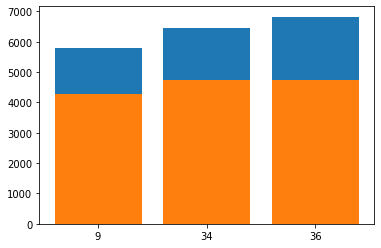

In [81]:
plt.bar(['9','34','36'],df.groupby('_STATE')['SMOKE100'].count())
plt.bar(['9','34','36'],df.groupby('_STATE')['SMOKDAY2'].count())

In [111]:
df['Smokers_Everyday'] = np.where(df['SMOKDAY2']==1, 1,0)
df['Smokers_Somedays'] = np.where(df['SMOKDAY2']==2, 1,0)
df['Smokers_None'] = np.where(df['SMOKDAY2']==3, 1,0)


In [147]:
df['Smokers_Everyday'].count()

34545

<BarContainer object of 3 artists>

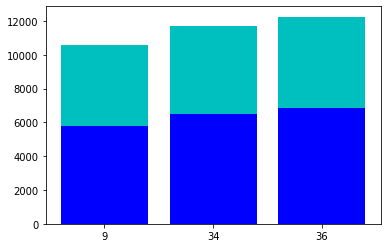

In [170]:
plt.bar(['9','34','36'],df.groupby('_STATE')['Smokers_Somedays'].count(),color='g')
plt.bar(['9','34','36'],df.groupby('_STATE')['Smokers_Everyday'].count(),color='r')
plt.bar(['9','34','36'],df.groupby('_STATE')['Smokers_None'].count(),color='c')
plt.bar(['9','34','36'],df.groupby('_STATE')['SMOKE100'].count(),color='b')

#This graph is a combination of all the data, but the colors are not displaying. Numbers are correct, but not displaying

In [217]:
smoker_count = df.groupby('_STATE')['Smokers_Somedays','Smokers_Everyday','Smokers_None','SMOKE100'].sum()
smoker_count

,Smokers_Somedays,Smokers_Everyday,Smokers_None,SMOKE100
_STATE,,,,
9,351,713,3218,0
34,484,927,3329,0
36,536,1036,3156,0


In [222]:
df.groupby('_STATE')['SMOKE100'].count()


_STATE
9     5790
34    6470
36    6827
Name: SMOKE100, dtype: int64

In [254]:
Somedays_list= list(Somedays)
Somedays_list

[351, 484, 536]

<BarContainer object of 3 artists>

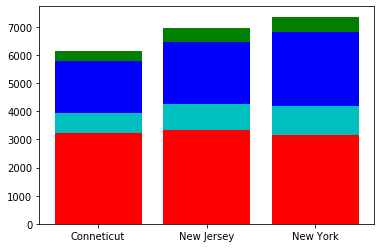

In [317]:
Somedays = df.groupby('_STATE')['Smokers_Somedays'].sum()
Everyday = df.groupby('_STATE')['Smokers_Everyday'].sum()
Quit = df.groupby('_STATE')['Smokers_None'].sum()
Never = df.groupby('_STATE')['SMOKE100'].count()

x = ['Conneticut','New Jersey', 'New York']
plt.bar(x=x, height=Never, color="b")
plt.bar(x=x, height=Quit, color="r")
plt.bar(x=x, height=Somedays, bottom=list(Never),  color="g")
plt.bar(x=x, height=Everyday, bottom=list(Quit), color="c")
#Smoking breakdown by State


<BarContainer object of 2 artists>

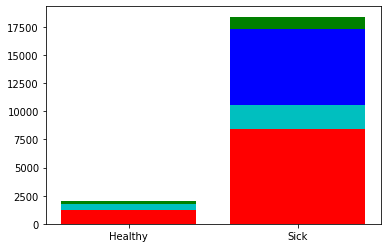

In [309]:
Somedays2 = df.groupby('Sick')['Smokers_Somedays'].sum()
Everyday2 = df.groupby('Sick')['Smokers_Everyday'].sum()
Quit2 = df.groupby('Sick')['Smokers_None'].sum()
Never2 = df.groupby('Sick')['SMOKE100'].count()

x2 = ['Healthy','Sick']
plt.bar(x=x2, height=Never2, color="b")
plt.bar(x=x2, height=Quit2, color="r")
plt.bar(x=x2, height=Somedays2, bottom=list(Never2),  color="g")
plt.bar(x=x2, height=Everyday2, bottom=list(Quit2), color="c")
#Smoking Down by Sick people

<BarContainer object of 2 artists>

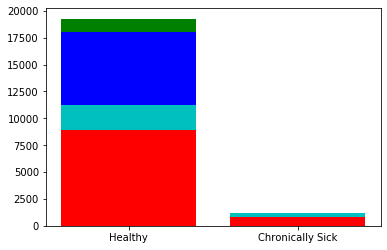

In [310]:
Somedays3 = df.groupby('Chronically Sick')['Smokers_Somedays'].sum()
Everyday3 = df.groupby('Chronically Sick')['Smokers_Everyday'].sum()
Quit3 = df.groupby('Chronically Sick')['Smokers_None'].sum()
Never3 = df.groupby('Chronically Sick')['SMOKE100'].count()

x3 = ['Healthy','Chronically Sick']
plt.bar(x=x3, height=Never3, color="b")
plt.bar(x=x3, height=Quit3, color="r")
plt.bar(x=x3, height=Somedays3, bottom=list(Never3),  color="g")
plt.bar(x=x3, height=Everyday3, bottom=list(Quit3), color="c")

## 7. Independent Variables (continuous):

Now let's look at a continuous variable (ALCDAY5) and see how that might impact a person's health. 

1. Clean up the values.
2. Calculate the descriptive statistics of the variable.
3. Generate a histogram for the variable.
4. Generate graphics that show how the responses to this variable might differ by state.
5. Calculate the correlation coefficient between `PHYSHLTH` and `ALCDAY5`.
5. Generate a graphic that shows the possible relationship between `PHYSHLTH` and `ALCDAY5`.

In [314]:
df['ALCDAY5'].describe()

count   32,212
mean       107
std         95
min          0
25%          0
50%        103
75%        203
max        230
Name: ALCDAY5, dtype: float64

In [333]:
alcohol_replace = {888:0,999:np.nan, 777:np.nan}
df['ALCDAY5'].replace(alcohol_replace, inplace=True)

(array([21222.,  5170.,  1855.,   878.,   208.,   612.,   670.,    28.,
          294.,  1275.]),
 array([0.        , 0.42857143, 0.85714286, 1.28571429, 1.71428571,
        2.14285714, 2.57142857, 3.        , 3.42857143, 3.85714286,
        4.28571429]),
 <a list of 10 Patch objects>)

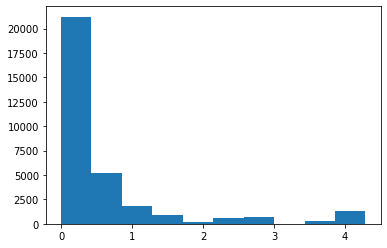

In [341]:
plt.hist(df['ALCDAY5'].dropna())

In [339]:
for i in range(0,len(df['ALCDAY5'])):
    if 100 <= df['ALCDAY5'].iloc[i] <= 108:
        df['ALCDAY5'].iloc[i]= ((df['ALCDAY5'].iloc[i]-100)/7)
    if 200 <= df['ALCDAY5'].iloc[i] <= 231:
        df['ALCDAY5'].iloc[i]= ((df['ALCDAY5'].iloc[i]-200)/30)


In [367]:
df['ALCDAY5'].describe()

count   32,212.00
mean         0.15
std          0.23
min          0.00
25%          0.00
50%          0.00
75%          0.29
max          0.86
Name: ALCDAY5, dtype: float64

<BarContainer object of 3 artists>

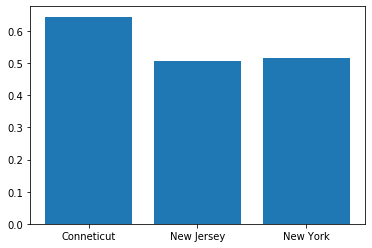

In [349]:
plt.bar(x=x, height=df.groupby('_STATE')['ALCDAY5'].mean())

<Figure size 720x720 with 0 Axes>

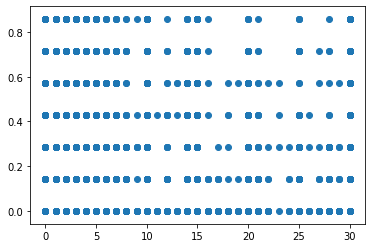

<Figure size 720x720 with 0 Axes>

In [378]:
plt.scatter(x=df['PHYSHLTH'], y=df['ALCDAY5'])
plt.figure(figsize=(10,10))

In [351]:
for i in range(0,len(df['ALCDAY5'])):
    if df['ALCDAY5'].iloc[i] >=1:
        df['ALCDAY5'].iloc[i] = 0

/Users/OwenPeng/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [376]:
df['ALCDAY5'].corr
df['PHYSHLTH'].corr

<bound method Series.corr of 49938    0.00
49939    0.00
49940    2.00
49941    0.00
49942    0.00
         ... 
303774   0.00
303775   0.00
303776   6.00
303777   0.00
303778   0.00
Name: PHYSHLTH, Length: 34545, dtype: float64>

<BarContainer object of 2 artists>

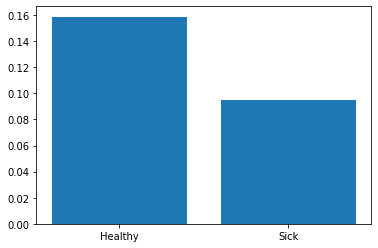

In [383]:
plt.bar(x=x2, height= df.groupby('Chronically Sick')['ALCDAY5'].mean())
#relationship between wine drinking and sickness

<BarContainer object of 2 artists>

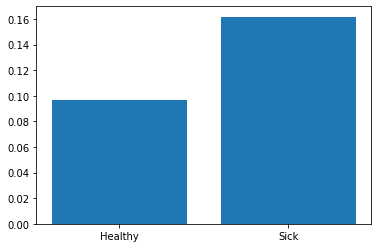

In [384]:
plt.bar(x=x2, height= df.groupby('Sick')['ALCDAY5'].mean())

## 8. Additional variables: Choose two additional survey items you would like to investigate do steps  6 or 7 for those variables.

In [388]:
# your code here
exercise_replace = {9:np.nan, 7:np.nan}
df['EXERANY2'].replace(exercise_replace, inplace=True)

<BarContainer object of 2 artists>

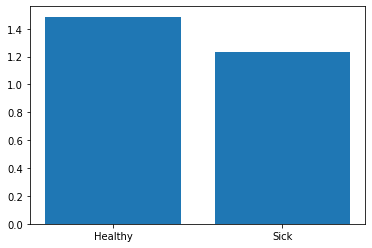

In [389]:
#amount of exercise for healthy and sick people
plt.bar(x=x2, height= df.groupby('Sick')['EXERANY2'].mean())

<BarContainer object of 2 artists>

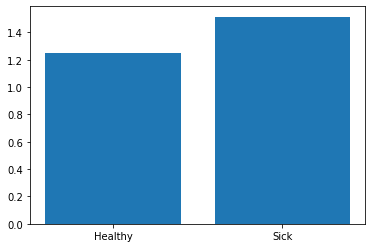

In [391]:
plt.bar(x=x2, height= df.groupby('Chronically Sick')['EXERANY2'].mean())

In [392]:
flu_replace = {9:np.nan, 7:np.nan}
df['FLUSHOT6'].replace(flu_replace, inplace=True)

<BarContainer object of 2 artists>

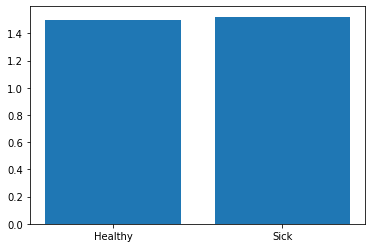

In [393]:
plt.bar(x=x2, height= df.groupby('Sick')['FLUSHOT6'].mean())

<BarContainer object of 2 artists>

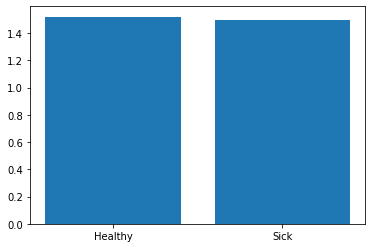

In [394]:
plt.bar(x=x2, height= df.groupby('Chronically Sick')['FLUSHOT6'].mean())

## 9. Based on your initial data exploration, what are some hypotheses of what affects a person's health that you would like to further investigate?

Type out your initial hyptotheses below:

1. 

2. 

3.  

## Bonus: Create some cool graphics.  

In [395]:
nonsmokers will have smokeday2 = blank, and smokeday100:2, smokeday2:3


SyntaxError: invalid syntax (<ipython-input-395-e0c7a8b3d37f>, line 1)